In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [37]:
train = pd.read_csv('train_1118.csv')
weather = pd.read_csv('weather_1118.csv')
pd.merge(train,weather, on='date').to_csv('train_join_1119.csv')

predict = pd.read_csv('predict_1119.csv')
pd.merge(predict,weather, on='date').to_csv('predict_join_1119.csv')

In [41]:
train = pd.read_csv('train_features_1119.csv')
predict = pd.read_csv('predict_features_1119.csv')
print(train.shape)
print(predict.shape)


(2208, 61)
(112, 58)


In [21]:
X = train.as_matrix(columns=['is_workday','temp_day','temp_night',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21'])
X.shape

(2208, 50)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

X = train.as_matrix(columns=['is_workday','temp_day','temp_night',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21'])
y10 = train.as_matrix(columns=['line10']).ravel()
y15 = train.as_matrix(columns=['line15']).ravel()

X_train, X_test, y10_train, y10_test, y15_train, y15_test = cross_validation.train_test_split(
    X, y10, y15, test_size=0.2, random_state=0)

clf10 = RandomForestRegressor(n_estimators=500)
clf10 = clf10.fit(X_train, y10_train)

clf15 = RandomForestRegressor(n_estimators=500)
clf15 = clf15.fit(X_train, y15_train)

print(clf10.score(X_train, y10_train))
print(clf10.score(X_test, y10_test))
print(clf15.score(X_train, y15_train))
print(clf15.score(X_test, y15_test))

0.992153676308
0.946883022209
0.990838637562
0.938482033488


In [42]:
X_predict = predict.as_matrix(columns=['is_workday','temp_day','temp_night',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21'])
print(X_predict.shape)
y10_predict = clf10.predict(X_predict)
#print(y10_predict)
y15_predict = clf15.predict(X_predict)
#print(y15_predict)

(112, 50)


In [43]:
s10 = pd.Series(y10_predict, name='y10').astype(int)
s15 = pd.Series(y15_predict, name='y15').astype(int)
predicted = pd.concat([predict, s10, s15], axis=1)
predicted[['date','hour','y10','y15']].to_csv('predict_rf_all_1119.csv')

In [27]:
predicted.to_csv('1118test.csv')

0.04166666666666666


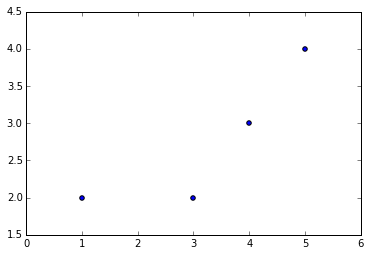

In [7]:
def precision(y_pred, y_real):
    """ cal precision:
    
    input two list
    output precision and plot(to do)
    """
    import math
    import statistics
    import matplotlib.pyplot as plt
    
    deviation = []
    
    for i in range(0, len(y_pred)):
        deviation.append(math.fabs(y_pred[i] - y_real[i]) / y_real[i])
    
    #print(deviation)
    
    for i in range(0, len(deviation)):
        if deviation[i] > 0.3:
            deviation[i] = 0
        else:
            deviation[i] = 1 - 1 / 0.3 * deviation[i]
    #print(deviation)
    print(statistics.mean(deviation))
    plt.scatter(y_pred, y_real)
    plt.show()
    
precision([1,3,4,5],[2,2,3,4]) # test code



0.774939122924


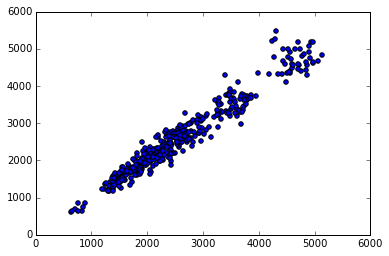

0.73115603132


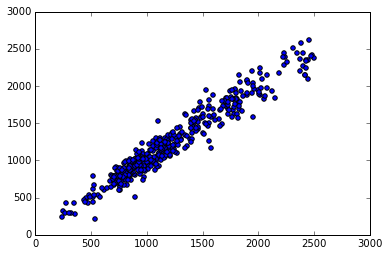

In [46]:
y10_pred_rf = clf10.predict(X_test)
y15_pred_rf = clf15.predict(X_test)

precision(y10_pred_rf,y10_test)
precision(y15_pred_rf,y15_test)

0.810517649474
0.762851533344
0.858789193519
0.82794778633
0.566314660234


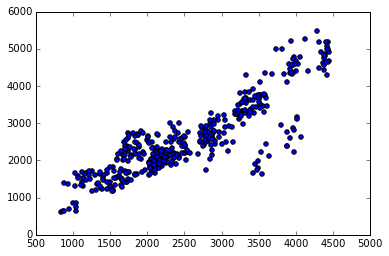

0.604550418124


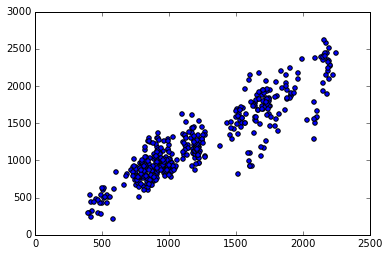

In [25]:
from sklearn import linear_model

clf10_linear = linear_model.LinearRegression()
clf10_linear = clf10_linear.fit(X_train, y10_train)

clf15_linear = linear_model.LinearRegression()
clf15_linear = clf15_linear.fit(X_train, y15_train)

print(clf10_linear.score(X_train, y10_train))
print(clf10_linear.score(X_test, y10_test))
print(clf15_linear.score(X_train, y15_train))
print(clf15_linear.score(X_test, y15_test))

y10_pred_linear = clf10_linear.predict(X_test)
precision(y10_pred_linear,y10_test)
y15_pred_linear = clf15_linear.predict(X_test)
precision(y15_pred_linear,y15_test)

0.810517649474
0.762851533344
0.858789193519
0.82794778633
0.566314660234


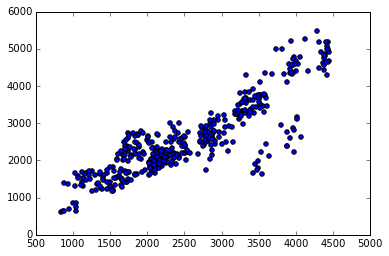

0.604550418124


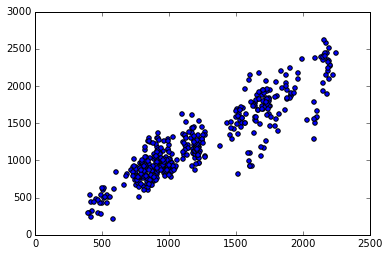

In [26]:
from sklearn import svm

clf10_svm = svm.SVR()
clf10_svm = clf10_linear.fit(X_train, y10_train)

clf15_svm = svm.SVR()
clf15_svm = clf15_linear.fit(X_train, y15_train)

print(clf10_svm.score(X_train, y10_train))
print(clf10_svm.score(X_test, y10_test))
print(clf15_svm.score(X_train, y15_train))
print(clf15_svm.score(X_test, y15_test))

y10_pred_svm = clf10_svm.predict(X_test)
precision(y10_pred_svm,y10_test)
y15_pred_svm = clf15_svm.predict(X_test)
precision(y15_pred_svm,y15_test)

In [44]:
clf10.feature_importances_


array([  1.80040451e-01,   1.14619814e-02,   1.24051376e-02,
         1.84415191e-03,   1.74710056e-03,   1.35990541e-03,
         1.63521863e-03,   1.75305049e-03,   2.44707818e-03,
         2.40992639e-03,   1.54289819e-03,   1.58144368e-03,
         6.42544762e-04,   0.00000000e+00,   0.00000000e+00,
         1.11793215e-03,   5.42351642e-04,   3.45217723e-04,
         3.86383170e-05,   7.54897475e-04,   9.91063803e-04,
         0.00000000e+00,   1.37420491e-03,   1.52067927e-03,
         7.00759279e-04,   0.00000000e+00,   2.66876636e-04,
         1.18222663e-03,   6.02617777e-04,   2.13721295e-04,
         1.92233591e-04,   4.38396342e-05,   1.36893813e-04,
         8.82434218e-04,   6.35485994e-02,   1.49925730e-01,
         2.15629369e-01,   6.36947168e-02,   1.89310497e-02,
         5.52253177e-04,   1.59472972e-03,   5.53648617e-04,
         2.29876539e-03,   6.13853028e-03,   1.89685252e-02,
         7.25117232e-02,   6.56031679e-02,   2.20963991e-03,
         3.55575978e-02,

In [45]:
clf15.feature_importances_

array([  7.49527142e-02,   1.68941778e-02,   1.79219417e-02,
         2.05552135e-03,   1.47356085e-03,   1.38382335e-03,
         1.61943043e-03,   2.88143612e-03,   3.49389606e-03,
         7.15140451e-03,   1.81820001e-03,   2.05101172e-03,
         7.52460663e-04,   0.00000000e+00,   0.00000000e+00,
         8.60036853e-04,   1.12400852e-03,   4.55846223e-04,
         3.70077107e-05,   1.45781300e-03,   2.80010743e-04,
         0.00000000e+00,   1.51942075e-03,   1.70815259e-03,
         8.94792179e-04,   0.00000000e+00,   1.00129625e-04,
         1.49040718e-03,   1.21934227e-03,   1.01372084e-04,
         2.92519058e-04,   3.85522026e-05,   3.52465454e-04,
         1.40687165e-04,   8.37853246e-02,   1.03793607e-01,
         2.52787793e-01,   7.65851081e-02,   9.02716875e-03,
         1.44709847e-03,   1.11163635e-02,   2.83092125e-03,
         1.57460166e-03,   1.34862589e-03,   7.97065071e-03,
         1.06901551e-01,   1.62749739e-01,   8.31781179e-03,
         6.72774680e-03,